In [1]:
import os
import pandas as pd #when using pandas, type pd
import matplotlib.pyplot as plt #when using matplotlib, type plt. remember to add ".pyplot"!

In [2]:
#Steps:
#Import folder
#Create a data table with pandas
#Establish columns
#Establishe steps for filename: 
#if has csv after ".", read the filename, rename columns, create day columns, establish day as filename, add day column
#Change NaN to 0

folder = "csse_covid_19_daily_reports_us (copied from Johns Hopkins Data)"

df = pd.DataFrame() #df is DataFrame

columns = ['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate']

for filename in os.listdir(folder):
    if filename.split(".")[1] == "csv":
        day = pd.read_csv(folder + "/" + filename)
        day = day.rename(columns={'Province/State':"Province_State"}) #remember "=" and brackets!
        day = day[columns]
        day['Date'] = filename.split(".")[0]
        df = df.append(day, ignore_index=True)
        
df = df.fillna(0)
df #df represents the new data table below

,Province_State,Confirmed,Deaths,Recovered,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Date
0,Alabama,3563,93,0.0,75.988020,21583.0,437.0,2.610160,04-12-2020
1,Alaska,272,8,66.0,45.504049,8038.0,31.0,2.941176,04-12-2020
2,Arizona,3542,115,0.0,48.662422,42109.0,0.0,3.246753,04-12-2020
3,Arkansas,1280,27,367.0,49.439423,19722.0,130.0,2.109375,04-12-2020
4,California,22795,640,0.0,58.137726,190328.0,5234.0,2.812020,04-12-2020
...,...,...,...,...,...,...,...,...,...
865,Washington,12753,711,0.0,168.927265,147953.0,544.0,5.575159,04-23-2020
866,West Virginia,981,31,380.0,74.149772,27905.0,108.0,3.160041,04-23-2020
867,Wisconsin,5052,258,0.0,97.631282,56508.0,1318.0,5.106888,04-23-2020
868,Wyoming,453,7,275.0,91.102888,7567.0,52.0,1.545254,04-23-2020


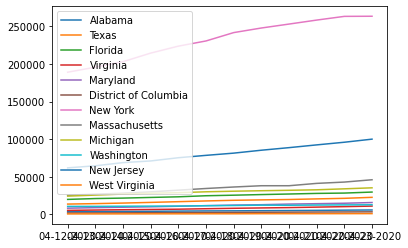

In [3]:
states = ["Alabama", "Texas", "Florida", "Virginia", "Maryland", "District of Columbia", "New York", "Massachusetts", "Michigan", "Washington", "New Jersey", "West Virginia"]

for state in states:
    s = df[df['Province_State'] == state]
    plt.plot(s['Date'], s['Confirmed'], label=state)
    
plt.legend()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

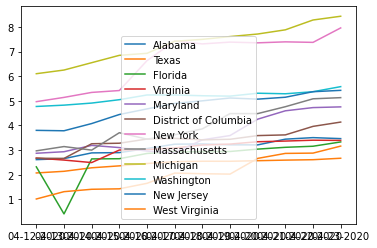

In [4]:
for state in states:
    s = df[df['Province_State'] == state]
    plt.plot(s['Date'], s['Mortality_Rate'], label=state)
    
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

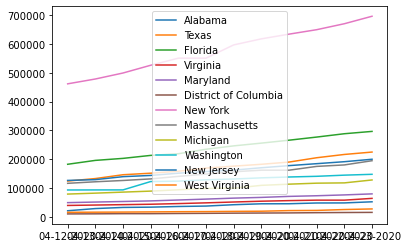

In [5]:
for state in states:
    s = df[df['Province_State'] == state]
    plt.plot(s['Date'], s['People_Tested'], label=state)
    
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

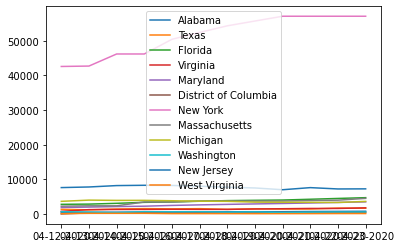

In [6]:
for state in states:
    s = df[df['Province_State'] == state]
    plt.plot(s['Date'], s['People_Hospitalized'], label=state)
    
plt.legend()
plt.show

In [7]:
#track since patient zero, puts on same time scale. data is supposedly more accurate
#steps:
#define states, define unique dates, establish sums of confirmed recovered etc., add to list

combined = pd.DataFrame() #combined is DataFrame

for state in states:
    s = df[df['Province_State'] == state]
    dates = df['Date'].unique()
    for index, date in enumerate(dates): #index-days since start
        day = s[s['Date'] == date]
        confirmed_sum = sum(day['Confirmed']) #establishes sum as new objects
        deaths_sum = sum(day['Deaths'])
        recovered_sum = sum(day['Recovered'])
        people_tested_sum = sum(day['People_Tested'])
        people_hospitalized_sum = sum(day['People_Hospitalized'])
        new_row = {'Province_State':state, 'Days Since Start': index, 'Confirmed': confirmed_sum, 'Deaths': deaths_sum, 'Recovered':recovered_sum, 'People_Tested': people_tested_sum, 'People_Hospitalized':people_hospitalized_sum}
        combined = combined.append(new_row, ignore_index=True) #append: add to list
        #to do: find a way to add normal mortality rate, not sum of mortality
    
combined #establishes a new data table called combined

,Confirmed,Days Since Start,Deaths,People_Hospitalized,People_Tested,Province_State,Recovered
0,3563.0,0.0,93.0,437.0,21583.0,Alabama,0.0
1,3734.0,1.0,99.0,457.0,29182.0,Alabama,0.0
2,3953.0,2.0,114.0,493.0,33117.0,Alabama,0.0
3,4075.0,3.0,118.0,525.0,34077.0,Alabama,0.0
4,4345.0,4.0,133.0,553.0,36391.0,Alabama,0.0
...,...,...,...,...,...,...,...
139,890.0,7.0,18.0,72.0,20031.0,West Virginia,265.0
140,902.0,8.0,24.0,77.0,22155.0,West Virginia,290.0
141,908.0,9.0,26.0,85.0,22763.0,West Virginia,330.0
142,939.0,10.0,27.0,103.0,25836.0,West Virginia,330.0


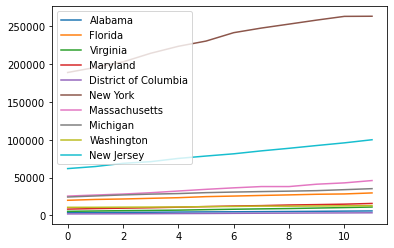

In [8]:
states = ["Alabama", "Florida", "Virginia", "Maryland", "District of Columbia", "New York", "Massachusetts", "Michigan", "Washington", "New Jersey"]
for state in states:
    s = combined[combined['Province_State'] == state] #we now use combined instead of df so 
    plt.plot(s['Days Since Start'], s['Confirmed'], label=state)
    
plt.legend()
plt.show()

#you can make more graphs using this template

In [9]:
#Steps: establish new data, then fill in 0 for na, then make every new data piece equal to 0 if negative

combined['New Cases'] = combined['Confirmed'] - combined['Confirmed'].shift(1)
combined['New Deaths'] = combined['Deaths'] - combined['Deaths'].shift(1)
combined['Newly Recovered'] = combined['Recovered'] - combined['Recovered'].shift(1)
combined['New Hospitalizations'] = combined['People_Hospitalized'] - combined['People_Hospitalized'].shift(1)
combined['Newly Tested'] = combined['People_Tested'] - combined['People_Tested'].shift(1)

combined = combined.fillna(0)  # Fill the NaN columns

# Set first value of dataset to zero since it returns negative
combined[combined['New Cases'] < 0] = 0
combined[combined['New Deaths'] < 0] = 0
combined[combined['Newly Recovered'] < 0] = 0
combined[combined['New Hospitalizations'] < 0] = 0
combined[combined['Newly Tested'] < 0] = 0
#change in mortality rate will remain negative. you can change that if you wish.

<function matplotlib.pyplot.show(*args, **kw)>

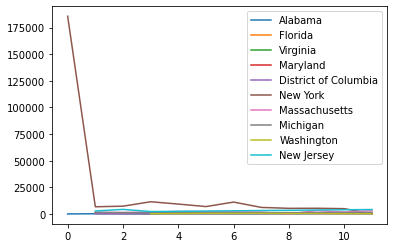

In [10]:
for state in states:
    s = combined[combined['Province_State'] == state]
    plt.plot(s['Days Since Start'], s['New Cases'], label = state)
    
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

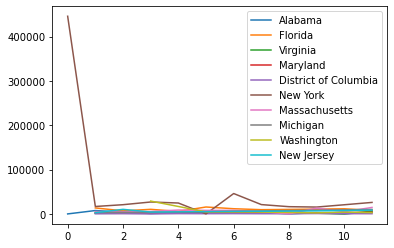

In [11]:
for state in states:
    s = combined[combined['Province_State'] == state]
    plt.plot(s['Days Since Start'], s['Newly Tested'], label = state)
    
plt.legend()
plt.show